In [ ]:
## Take a look at cell 6 if you wish to load any respective CSV files as this was done on google collab 

# SC1015 - Mini Project 
Topic: Cardiovascular Disease (CVD) Prediction 



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [ ]:
import plotly.graph_objects as go
import plotly.express as px


import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Features Description


Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving heart.csv to heart.csv


In [ ]:
#read original dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.shape


(918, 12)

In [ ]:
df.iloc[:, 1]

for i in range(11):
    print(df.iloc[:, i].describe())
    print()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64

count        918
unique         3
top       Normal
freq   

**Brief Data Cleaning**

*   Remove of duplicates (if any)
*   Check if there are any NA values in the dataset 



In [ ]:
df.drop_duplicates()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.isna().all()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

We can conclude that there are no duplicates and invalid values. we can now proceed to more data visualisation and data preparation. 

The different types of variables in this dataset fall under two main categories of continuous and categorical. By doing this variable type categorising, it will allow for easier data encoding in later sections.


In [ ]:
#categorising them under diff types of variables 
continuous_predictors = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]  
categorical_predictors = ["ChestPainType", "RestingECG", "ST_Slope", "Sex", "FastingBS", "ExerciseAngina"]

## Visualisation of dataset before performing any EDA

##The visualisation below is for the categorical in the dataset

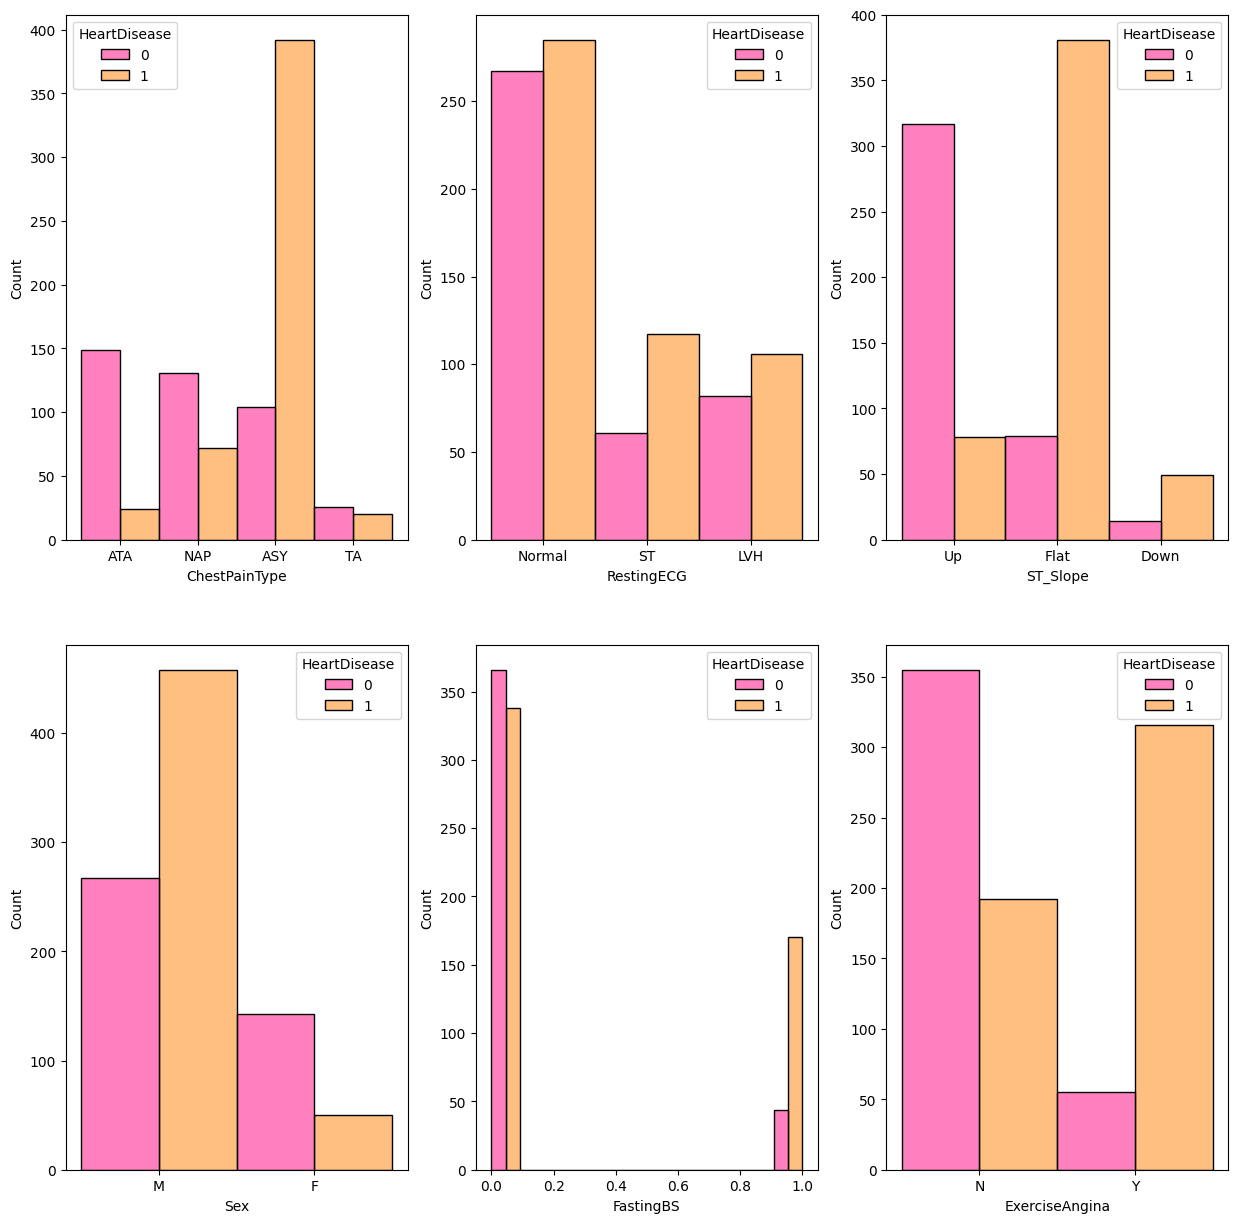

In [ ]:
categorical_predictors = ["ChestPainType", "RestingECG", "ST_Slope", "Sex", "FastingBS", "ExerciseAngina"]
count = 1
f, axes = plt.subplots(2,3, figsize=(15,15))
for i in categorical_predictors:
    plt.subplot(2,3,count)
    
    sns.histplot(data = df, x = i, hue = "HeartDisease", kde=False, palette="spring", multiple = "dodge")
    count += 1

## EDA on Categorical data based on data visualisation



From the bar graph, we can determine that there is little to no abnormalies in the dataset. 

## The visualisation below is for the continuous variables in the dataset


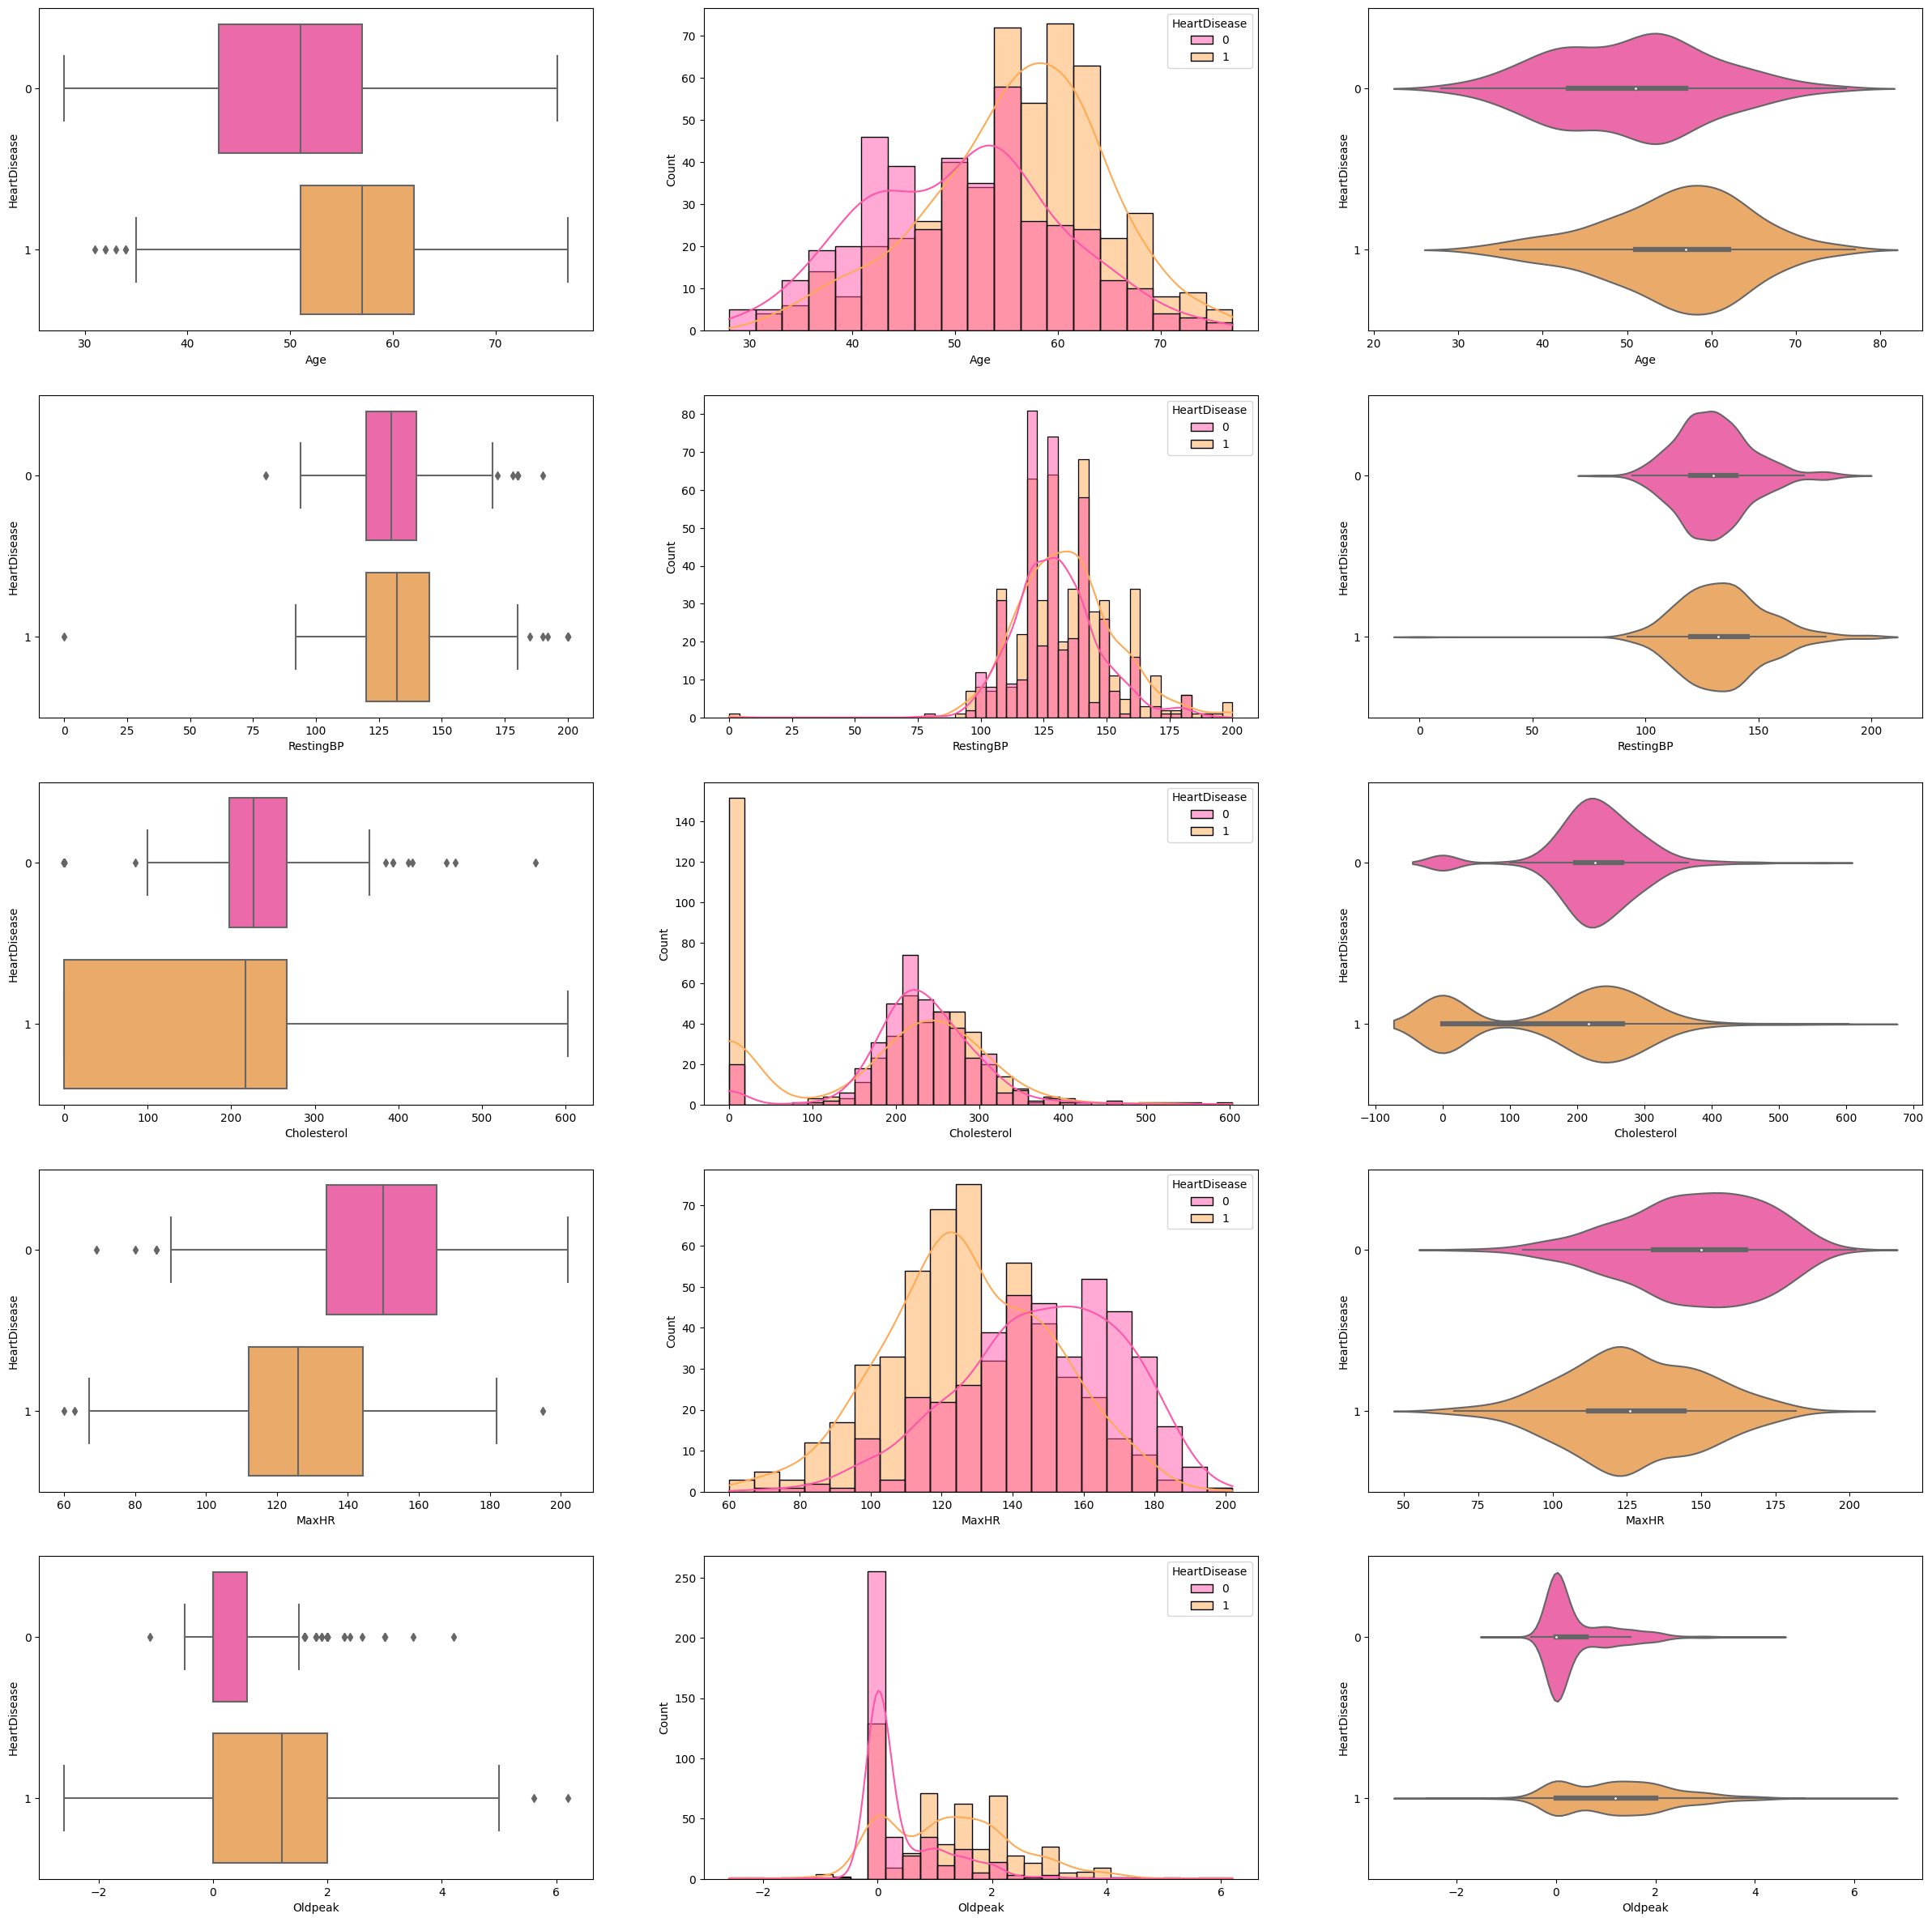

In [ ]:
f,  axes= plt.subplots(5, 3, figsize=(30,30))
count = 0
for var in continuous_predictors:
    
    sns.boxplot(x = df[var], y= df["HeartDisease"], orient = "h", ax = axes[count,0], palette="spring")
    sns.histplot(data = df, x = var, hue = "HeartDisease", kde=True, ax = axes[count,1], palette="spring")
    sns.violinplot(x = df[var], y= df["HeartDisease"], orient = "h", ax = axes[count,2] , palette="spring")
    count += 1

## EDA on Numerical data based on data visualisation

#### **Cholesterol:**

From the violinplot and histogram seen above, It can be seen visually that cholesterol has a large number of data points with cholesterol value of 0 which results in a bimodal distribution. This raised suspicion of improper data collection or abnormalies. Hence, the team will engage in data cleaning regarding that feature. 

#### **Other features:**

From the boxplot, it can be determined that there is no clear relation between the feature and the response as there is overlap in the 2 boxplots which does not allow clear distinction of the binary outcome. Therefore our group will be using the correlation value to determine which are the suitable numeric variables to use for our machine learning models after we clean the Cholesterol data. 